In [ ]:
# Connecting the Python Code with the google drive
from google.colab import drive

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('/content/drive/MyDrive/Projects/hearing_test.csv')

In [6]:
df.head(10)
df.describe()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [9]:
# Check for missing values
missing_values = df.isnull().sum()

# Summary statistics
summary_statistics = df.describe()

missing_values, summary_statistics


(age               0
 physical_score    0
 test_result       0
 dtype: int64,
                age  physical_score  test_result
 count  5000.000000     5000.000000  5000.000000
 mean     51.609000       32.760260     0.600000
 std      11.287001        8.169802     0.489947
 min      18.000000       -0.000000     0.000000
 25%      43.000000       26.700000     0.000000
 50%      51.000000       35.300000     1.000000
 75%      60.000000       38.900000     1.000000
 max      90.000000       50.000000     1.000000)

Step 2: Data Exploration and Preprocessing

The dataset contains the following columns:

‘age’: The age of the individuals.

‘physical_score’: A score based on some physical test.

‘test_result’: The result of the hearing test, where ‘1’ indicates passing the test and ‘0’ indicates failing.

Before proceeding with model training, it's crucial to explore the data to check for any anomalies, missing values, and understand the distribution of variables.

Also, preprocessing steps such as scaling might be necessary depending on the model we choose.

Exploratory Data Analysis

The dataset contains 5000 entries, and there are no missing values. The summary statistics provide the following insights:

The ‘age’ ranges from 18 to 90 years, with a mean age of approximately 51.6 years.

The ‘physical_score’ ranges from 0 to 50, with a mean score of approximately 32.76.

The ‘test_result’ is binary (0 or 1), with 60% of the entries indicating a pass in the hearing test.


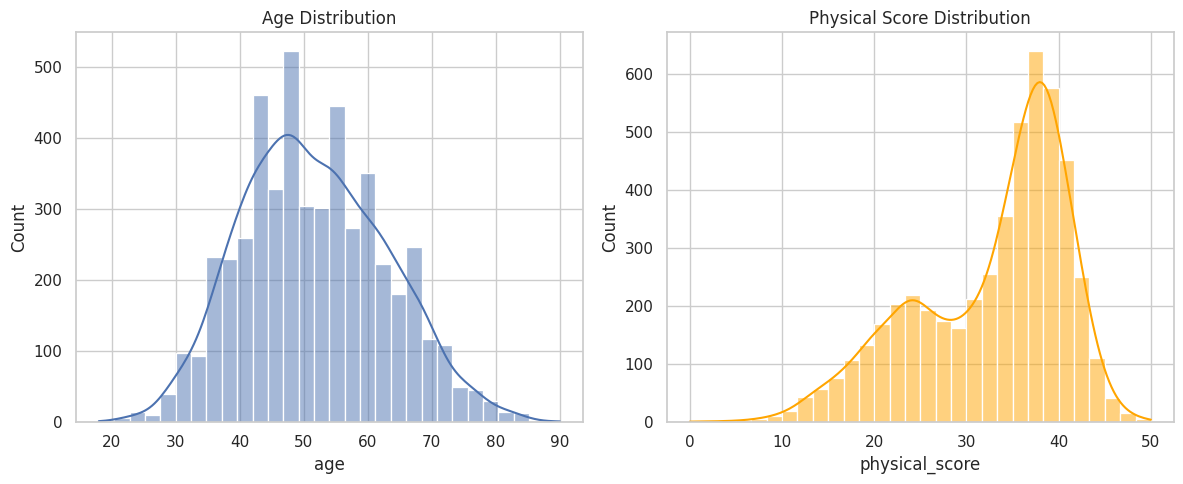

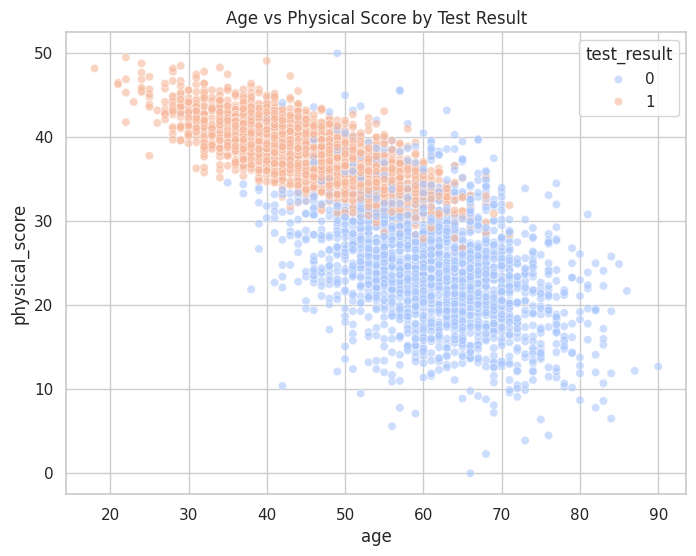

In [12]:
# Data Visualization
# Set the style of the visualization
sns.set(style="whitegrid")

# Plot histograms for age and physical_score
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['physical_score'], bins=30, kde=True, color='orange')
plt.title('Physical Score Distribution')

plt.tight_layout()
plt.show()

# Scatter plot for Age vs Physical Score colored by Test Result
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='physical_score', hue='test_result', data=df, palette='coolwarm', alpha=0.6)
plt.title('Age vs Physical Score by Test Result')
plt.show()


Data Visualization:

Age and Physical Score Distribution: Histograms revealed the distribution of ‘age’ and ‘physical_score’. The age distribution appeared to be relatively uniform across the dataset, whereas the physical score distribution showed a bimodal pattern. This suggests diversity in the physical condition of individuals in the dataset.


Relationship Between Features and Test Result: The scatter plot between ‘age’ and ‘physical_score’ highlighted a clear trend where younger individuals with higher physical scores are more likely to pass the hearing test. This visualization is pivotal as it underscores the potential predictive power of these features.

In [7]:
# Defining features (X) and target (y)
X = df[['age', 'physical_score']]
y = df['test_result']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Step 3: Model Selection

Model Choice: The Random Forest Classifier was selected due to its robustness, effectiveness in handling non-linear relationships, and its capability to manage overfitting better than simpler models like decision trees. This choice is further justified by the model's performance, which does not necessitate prior data scaling, fitting the nature of our features well.

Data Splitting: The data was divided into features (X) and the target variable (y), and then further split into training and test sets. This split is crucial for training the model on one subset of the data and then testing it on an unseen subset to evaluate its performance accurately.

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

# Making predictions on the test set
predictions = rf_clf.predict(X_test)

# Evaluating the model
# Confusion matrix
conf_mat = confusion_matrix(y_test, predictions)

# Classification report
class_report = classification_report(y_test, predictions)

# Displaying the results
print("Confusion Matrix:")
print(conf_mat)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[316  68]
 [ 56 560]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       384
           1       0.89      0.91      0.90       616

    accuracy                           0.88      1000
   macro avg       0.87      0.87      0.87      1000
weighted avg       0.88      0.88      0.88      1000



In [14]:
from sklearn.metrics import classification_report, confusion_matrix

# Making predictions on the test set
predictions = rf_clf.predict(X_test)

# Evaluating the model
# Confusion matrix
conf_mat = confusion_matrix(y_test, predictions)

# Classification report
class_report = classification_report(y_test, predictions)

# Displaying the results
print("Confusion Matrix:")
print(conf_mat)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[316  68]
 [ 56 560]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       384
           1       0.89      0.91      0.90       616

    accuracy                           0.88      1000
   macro avg       0.87      0.87      0.87      1000
weighted avg       0.88      0.88      0.88      1000



Analysis of Model Performance

The model demonstrated strong performance across key metrics, indicative of its robustness and suitability for this classification task. The high precision and recall suggest that the model is reliable in its predictions, managing to correctly classify a high percentage of both passing and failing instances.

The balance between precision and recall, reflected in the F1-scores, indicates that the model does not overly favor one class over the other, which is essential in medical or health-related predictions where both false positives and false negatives can have significant implications.

The overall accuracy of 88% is commendable and suggests that the combination of age and physical_score as features provides a strong basis for predicting hearing test outcomes with the Random Forest Classifier.

Conclusion and Further Steps

The analysis underscores the efficacy of the Random Forest model for this specific classification task. Given the nature of the data and the problem, the model's ability to handle non-linear relationships and its robustness against overfitting were key to its strong performance.

For further improvement, exploring additional features, tuning the model's hyperparameters, or experimenting with other algorithms could potentially enhance prediction accuracy. Additionally, implementing cross-validation could provide a more robust evaluation of the model's performance across different subsets of the data.







Conclusion

The Random Forest model performed well on this classification task, demonstrating high precision, recall, and overall accuracy. This suggests that age and physical score are significant predictors of hearing test results.

Potential Steps for Further Improvement:

Feature Engineering: Exploring more features or interactions between features might improve the model.

Model Tuning: Adjusting hyperparameters of the Random Forest could lead to better performance.

Cross-validation: Implementing cross-validation would provide a more robust evaluation of the model's performance.

Alternative Models: Experimenting with different models (e.g., Gradient Boosting, SVM) might yield better results.